In [184]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import plotly.express as px

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# The dataset includes the gene expression values of five
# types of cancer: lung adenocarcinoma (LUAD),
# breast invasive carcinoma (BRCA), kidney renal clear cell
# carcinoma (KIRC), lung squamous cell carcinoma (LUSC),
# and uterine corpus endometrial carcinoma (UCEC).

# https://data.mendeley.com/datasets/sf5n64hydt/1
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL20573

In [ ]:
dir = os.path.join('sf5n64hydt-1', 'cancer types.mat')
mat = scipy.io.loadmat(dir)
mat

In [81]:
print('\n'.join([key for key in mat.keys()]))

__header__
__version__
__globals__
cancerTypes
data
geneIds


In [112]:
# cancer type for each row in the data
mat['cancerTypes'].shape

(2086, 1)

In [168]:
cancerTypes = [type[0][0] for type in mat['cancerTypes']]
cancerTypes[:5]

['BRCA', 'BRCA', 'BRCA', 'BRCA', 'BRCA']

In [113]:
# gene expression values
mat['data'].shape

(2086, 972)

In [114]:
# gene names
mat['geneIds'].shape

(1, 971)

In [117]:
data = mat['data'][:,:971] # removed column indicating cancer type
data.shape

(2086, 971)

In [169]:
genes = [id[0]for id in mat['geneIds'][0]]
genes[:5]

['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3']

In [171]:
encoded_types = mat['data'][:,971]
encoded_types = encoded_types - 1 # zero-indexed
np.unique(encoded_types)

array([0., 1., 2., 3., 4.])

In [172]:
encoded_types.shape

(2086,)

In [173]:
df = pd.DataFrame(data=data, columns=genes)
df

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
0,44.023542,9.216286,11.319078,33.215176,16.901427,9.031338,1.109961,20.017821,16.724363,10.494192,...,29.275809,21.706486,16.315579,4.224009,8.602081,23.762341,8.302416,1.408731,4.295620,8.768768
1,29.746157,9.765600,40.540128,30.169134,20.047393,32.237287,2.460624,17.029112,28.346167,17.017284,...,65.896789,12.815215,10.150965,8.914809,6.797915,15.379187,11.420690,6.599729,3.819019,5.758501
2,35.799315,9.884781,3.886043,29.984211,17.135946,21.273727,1.501203,20.598204,25.855152,12.275738,...,44.571276,14.344729,11.224647,7.870991,7.724003,25.762396,8.628786,4.104879,4.382387,5.306177
3,26.490401,7.085828,10.804003,23.482255,17.044085,14.880104,1.299056,14.978582,31.214294,10.015235,...,51.223656,13.660995,9.730124,7.804760,5.030966,8.964868,7.990036,4.251886,3.702483,7.500498
4,27.632466,7.642971,3.670265,16.584843,20.375321,22.174600,1.553541,14.909150,54.435490,13.392213,...,55.927277,16.650019,8.584938,7.485410,5.945771,9.205302,8.761025,4.656969,3.827945,7.939863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,23.758989,15.394219,10.883932,21.691852,20.209391,30.078659,0.978559,13.002383,28.629486,6.387968,...,19.716977,10.900725,4.188131,2.499783,2.422833,10.061337,3.966998,2.323246,42.449235,2.661792
2082,27.990210,28.998590,8.701462,27.579071,29.770012,15.744797,3.759037,13.468529,20.548527,5.557939,...,38.833607,13.409906,8.146828,3.390904,3.621281,18.706152,4.272848,1.199481,3.990134,1.665184
2083,14.665414,20.195646,6.703477,19.648529,12.530305,24.321260,2.263398,9.642926,30.248579,22.157856,...,29.583893,4.310888,7.920039,2.731255,4.168946,4.470333,3.064729,1.341491,1.830216,2.355292
2084,31.116022,14.562066,9.121585,13.831678,15.535040,41.278765,1.044817,8.012867,8.701291,4.777847,...,15.115717,5.303415,3.716170,1.802522,1.466401,4.209371,2.633839,0.908784,1.176131,1.891297


In [174]:
X = df.values
X

array([[44.02354236,  9.21628619, 11.31907844, ...,  1.40873072,
         4.2956195 ,  8.76876844],
       [29.74615746,  9.7656002 , 40.540128  , ...,  6.59972888,
         3.81901941,  5.75850117],
       [35.79931536,  9.88478062,  3.886043  , ...,  4.10487884,
         4.38238737,  5.30617722],
       ...,
       [14.66541424, 20.19564581,  6.7034771 , ...,  1.34149059,
         1.83021579,  2.35529186],
       [31.11602192, 14.56206615,  9.12158501, ...,  0.9087842 ,
         1.17613142,  1.89129728],
       [74.04662769, 13.00396207,  9.47227364, ...,  4.25296664,
         4.33718205,  9.33315169]])

In [176]:
y = encoded_types
y

array([0., 0., 0., ..., 4., 4., 4.])

In [138]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 0.17836082, -0.38885229, -0.25400484, ..., -1.04988521,
         0.24837591,  0.77270934],
       [-0.5282126 , -0.32843441,  0.64026652, ...,  1.12750571,
         0.05306413, -0.16047082],
       [-0.22864791, -0.31532601, -0.481483  , ...,  0.08102801,
         0.28393357, -0.30069084],
       ...,
       [-1.27454343,  0.81874406, -0.39525918, ..., -1.07808943,
        -0.76195199, -1.21546267],
       [-0.46041939,  0.19911865, -0.3212562 , ..., -1.25959035,
        -1.02999721, -1.35930057],
       [ 1.66417313,  0.0277461 , -0.31052384, ...,  0.1431442 ,
         0.26540833,  0.94766764]])

In [157]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df

,PC1,PC2
0,1.944554,-5.781887
1,6.685335,-10.197388
2,8.753382,-3.274183
3,5.971544,0.610894
4,4.992903,-1.638601
...,...,...
2081,-2.172339,20.524243
2082,1.122024,17.474741
2083,-8.299642,12.981320
2084,-16.151747,13.746504


In [179]:
final_df = pd.concat([principal_df, pd.DataFrame(cancerTypes)], axis=1)
final_df.rename(columns={0:'cancer_type'}, inplace=True)
final_df

,PC1,PC2,cancer_type
0,1.944554,-5.781887,BRCA
1,6.685335,-10.197388,BRCA
2,8.753382,-3.274183,BRCA
3,5.971544,0.610894,BRCA
4,4.992903,-1.638601,BRCA
...,...,...,...
2081,-2.172339,20.524243,UCEC
2082,1.122024,17.474741,UCEC
2083,-8.299642,12.981320,UCEC
2084,-16.151747,13.746504,UCEC


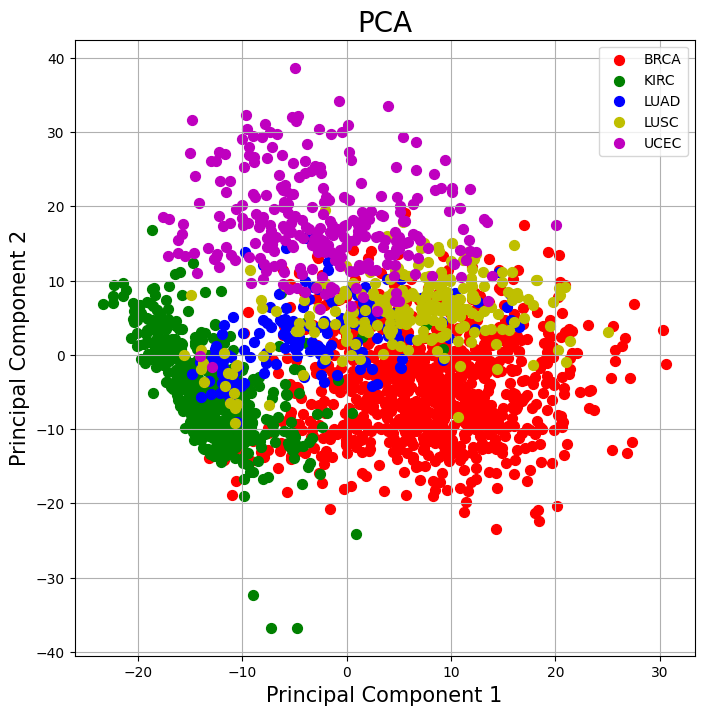

In [181]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = ['BRCA', 'KIRC', 'LUAD', 'LUSC', 'UCEC']
colors = ['r', 'g', 'b', 'y', 'm']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['cancer_type'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [182]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
principal_df

,PC1,PC2,PC3
0,1.944555,-5.781887,-0.076198
1,6.685335,-10.197388,-8.019992
2,8.753383,-3.274183,-9.731206
3,5.971544,0.610893,-9.492819
4,4.992904,-1.638601,-12.268770
...,...,...,...
2081,-2.172339,20.524243,-5.028994
2082,1.122024,17.474742,-3.003932
2083,-8.299643,12.981320,-0.523186
2084,-16.151747,13.746504,-4.113261


In [183]:
final_df = pd.concat([principal_df, pd.DataFrame(cancerTypes)], axis=1)
final_df.rename(columns={0:'cancer_type'}, inplace=True)
final_df

,PC1,PC2,PC3,cancer_type
0,1.944555,-5.781887,-0.076198,BRCA
1,6.685335,-10.197388,-8.019992,BRCA
2,8.753383,-3.274183,-9.731206,BRCA
3,5.971544,0.610893,-9.492819,BRCA
4,4.992904,-1.638601,-12.268770,BRCA
...,...,...,...,...
2081,-2.172339,20.524243,-5.028994,UCEC
2082,1.122024,17.474742,-3.003932,UCEC
2083,-8.299643,12.981320,-0.523186,UCEC
2084,-16.151747,13.746504,-4.113261,UCEC


In [220]:
fig = px.scatter_3d(final_df,
                    x='PC1', y='PC2', z='PC3',
                    color='cancer_type',
                    width=1000, height=800,
                    opacity=1
                    )

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')
                              ),
                  )

fig.show()

In [229]:
tsne = TSNE(n_components=2).fit_transform(scaled_X)
principal_df = pd.DataFrame(data=tsne, columns=['t-SNE_1', 't-SNE_2'])
final_df = pd.concat([principal_df, pd.DataFrame(cancerTypes)], axis=1)
final_df.rename(columns={0:'cancer_type'}, inplace=True)
final_df

,t-SNE_1,t-SNE_2,cancer_type
0,22.073488,-14.644595,BRCA
1,33.684891,-0.330666,BRCA
2,29.867752,6.310031,BRCA
3,27.577444,7.449486,BRCA
4,28.630804,10.636940,BRCA
...,...,...,...
2081,-7.695124,19.198542,UCEC
2082,-3.588310,17.521769,UCEC
2083,-10.952806,15.113638,UCEC
2084,-14.442903,18.635004,UCEC


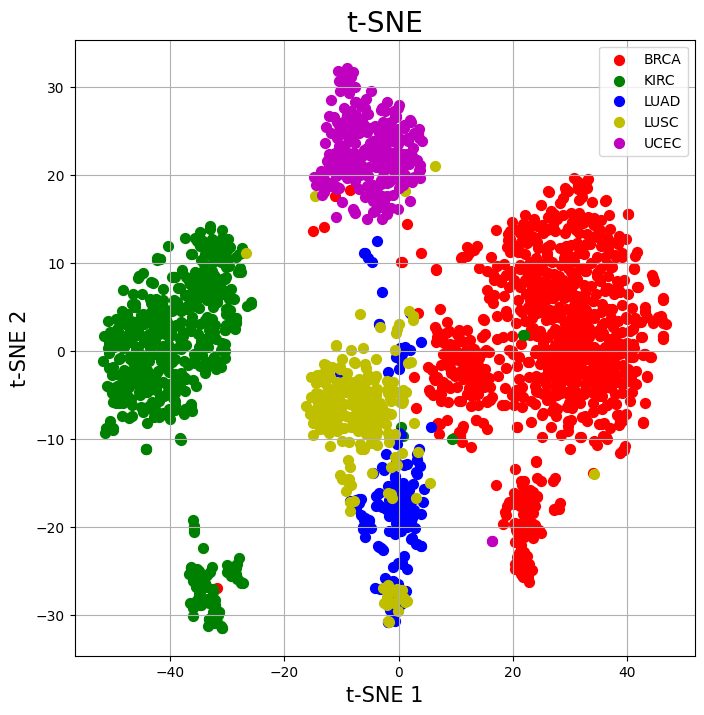

In [228]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('t-SNE 1', fontsize = 15)
ax.set_ylabel('t-SNE 2', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)

targets = ['BRCA', 'KIRC', 'LUAD', 'LUSC', 'UCEC']
colors = ['r', 'g', 'b', 'y', 'm']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['cancer_type'] == target
    ax.scatter(final_df.loc[indicesToKeep, 't-SNE_1']
               , final_df.loc[indicesToKeep, 't-SNE_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [230]:
tsne = TSNE(n_components=3).fit_transform(scaled_X)
principal_df = pd.DataFrame(data=tsne, columns=['t-SNE_1', 't-SNE_2', 't-SNE_3'])
final_df = pd.concat([principal_df, pd.DataFrame(cancerTypes)], axis=1)
final_df.rename(columns={0:'cancer_type'}, inplace=True)
final_df

,t-SNE_1,t-SNE_2,t-SNE_3,cancer_type
0,4.988379,-7.505836,3.444173,BRCA
1,10.346940,-5.240821,-4.012223,BRCA
2,6.780197,-1.439491,-7.437528,BRCA
3,4.733981,-0.676449,-7.085498,BRCA
4,6.130944,1.750940,-9.279440,BRCA
...,...,...,...,...
2081,-0.800610,8.543835,-3.526863,UCEC
2082,-0.843558,9.623408,-0.201159,UCEC
2083,-3.523325,7.753725,-0.786909,UCEC
2084,-6.145273,6.322670,-3.629594,UCEC


In [231]:
fig = px.scatter_3d(final_df,
                    x='t-SNE_1', y='t-SNE_2', z='t-SNE_3',
                    color='cancer_type',
                    width=1000, height=800,
                    opacity=1
                    )

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')
                              ),
                  )

fig.show()